# Levich and Koutechy-Levich analysis notebook for Step data.

## 1. Import needed libraries

In [1]:
from pathlib import Path
from ec4py import *
from ec4py import Quantity_Value_Unit as QV

## 2.Make a list of paths to the data files.

In [2]:
paths = []
path_to_dataSetFolder = Path(".").cwd().parent.parent / "test_data" /"Step" / "Rotation"
print(path_to_dataSetFolder)
#paths.append( path_to_dataSetFolder / "CV_144913_ 3.tdms")
paths.append( path_to_dataSetFolder / "Steps_125706.tdms")
paths.append( path_to_dataSetFolder / "Steps_125853.tdms")
paths.append( path_to_dataSetFolder / "Steps_130037.tdms")
paths.append( path_to_dataSetFolder / "Steps_130222.tdms")
paths.append( path_to_dataSetFolder / "Steps_130407.tdms")
paths.append( path_to_dataSetFolder / "Steps_130552.tdms")

print()

c:\Users\gustav.wiberg\Documents\GitHub\NordicEC\EC4py\test_data\Step\Rotation



## 3. Load in the data files

In [3]:
d = EC_Data(paths[1])
print(d.channels)
#d.plot("E","Z_E")
e =Step_Data()
e =e.conv(d)

['Time', 'E', 'Ucell', 'i', 'Z_E', 'Z_cell', 'Phase_E', 'Phase_cell']


In [4]:
d = Step_Data(paths[1])
ds= Step_Datas(paths)
for d in ds:
    d.set_RHE(5)
    #print( d.setup["RHE"])

In [5]:
d.setup

{'Current Range': '10mA',
 'Control Mode': 'WE',
 'Cell Switch': 'TRUE',
 'Step.Type': 'h; h; h; h; h; h; h; h; h; h; h; ',
 'Step.E': '0.750; 0.000; -0.050; -0.100; -0.150; -0.200; -0.250; -0.300; -0.350; -0.400; -0.450; ',
 'Step.Time': '5.000; 10.000; 10.000; 10.000; 10.000; 10.000; 9.000; 10.000; 10.000; 10.000; 10.000; ',
 'Repetitions': '1',
 'Method.Duration': '104.0',
 'Method.Cycle Duration': '104.0',
 'Method.Avg.Time': '0.01',
 'AC Frequency': '5.000E+3 Hz',
 'AC Amplitude': '0.0100 V',
 'Gas': 'Ar',
 'Temp_0': '298.15 K',
 'Temp_1': '298.15 K',
 'Pressure': '100000 Pa',
 'Cell Material': 'Glass',
 'CounterElectrode': 'Pt',
 'Ref.Electrode': 'Ag/AgCl',
 'R.solution': '-1.00 Ohm',
 'IR.compensation': '-1.00 Ohm',
 'Electrolyte1': '0.001 M_NaClO4: H2O_14',
 'Electrolyte2': '_: _',
 'Electrolyte3': '_: _',
 'Electrode.Material': '',
 'Electrode.Tip': '',
 'Electrode.Area': '1.96E-5 m^2',
 'Electrode.ExElectrode': '',
 'Electrode.Cat.Loading': '0.00E+0 g m^-2',
 'Electrode.Cat.W

1
[0.75, 0.0, -0.05, -0.1, -0.15, -0.2, -0.25, -0.3, -0.35, -0.4, -0.45] ['h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h']


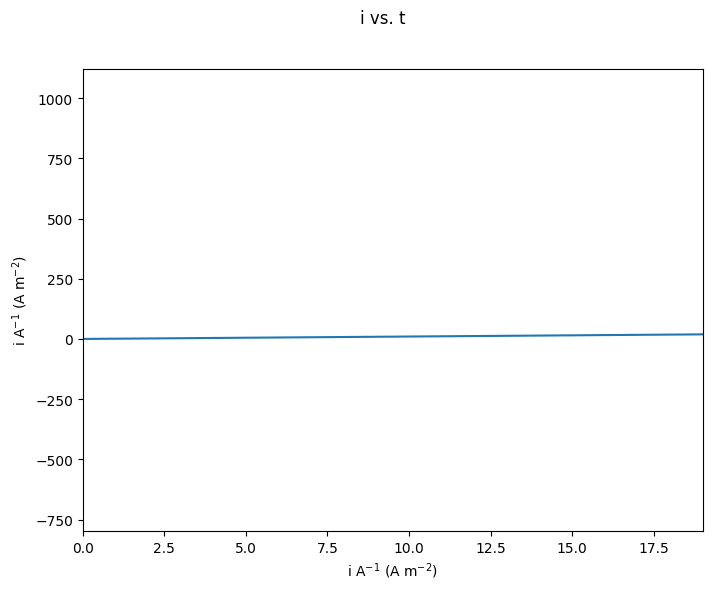

In [14]:
d.plot("i", AREA, xlim=[0.,19],title="i vs. t")
#print(d.nr_of_steps)

print(d.repetitions)
print(d.step_E,d.step_Type)

5.000e+00 V


{'title': 'AAA',
 'plot': <Axes: xlabel='t (s)', ylabel='i A$^{-1}$ (A m$^{-2}$)'>}

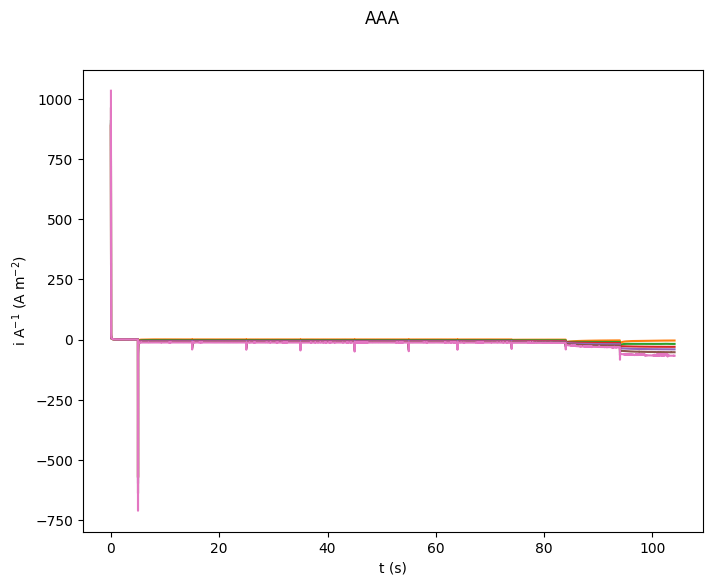

In [7]:
print(ds[0].get_pot_offset("RHE"))
ds.plot("area",title="AAA")


Levich analysis
 :     	A cm^-2 / rpm^0.5
slope: 	-1.81e-04
-1.812e-04 A cm^-2 rpm^-0.5


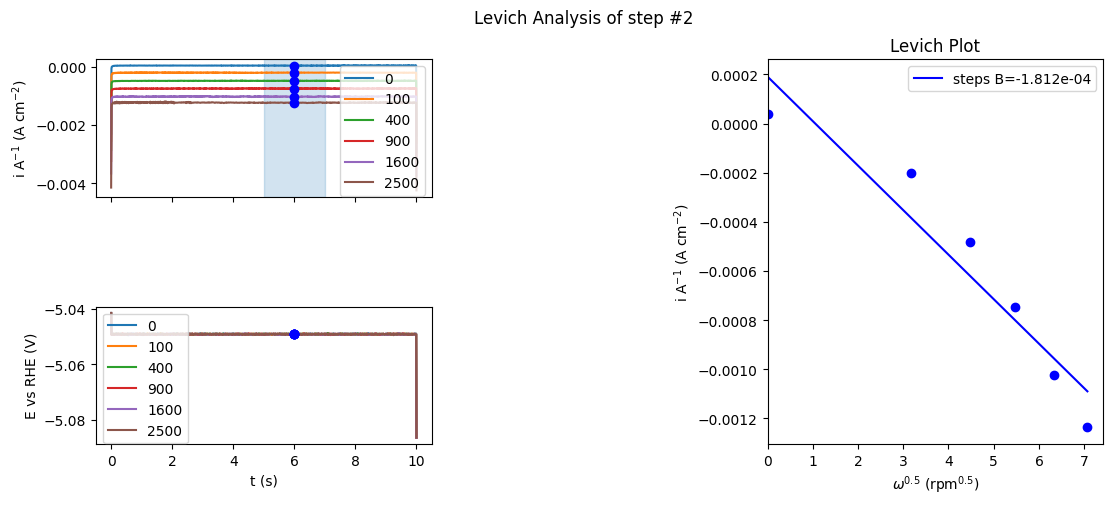

In [8]:
print(ds.Levich(5,2, "area_cm", "RHE", t_end=7 ))

In [9]:
#ds.integrate(0,5,3,"RHE")

(<matplotlib.lines.Line2D at 0x2436f30fa10>,
 <Axes: xlabel='t (s)', ylabel='E vs Ag/AgCl (V)'>)

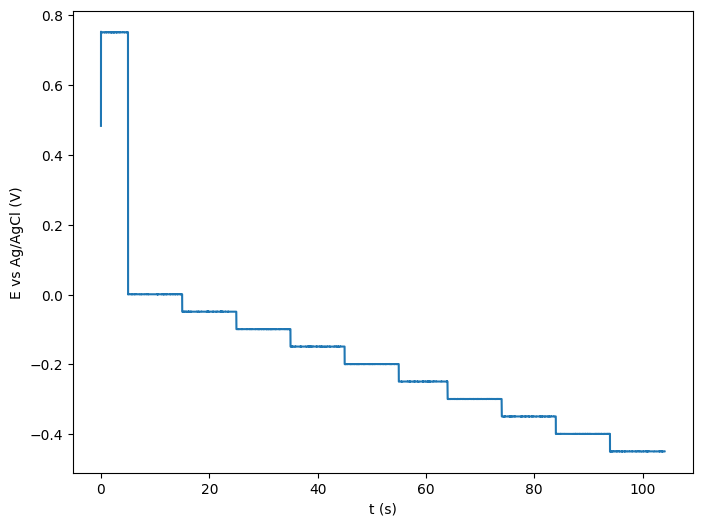

In [10]:
#ds[1].pot_shift("RHE")
#print(ds[1].setup["RHE"])
#ds[1].pot_shift("RHE")
ds[1].plot("Time","E" , "area")

-2.512e-03 C cm^-2


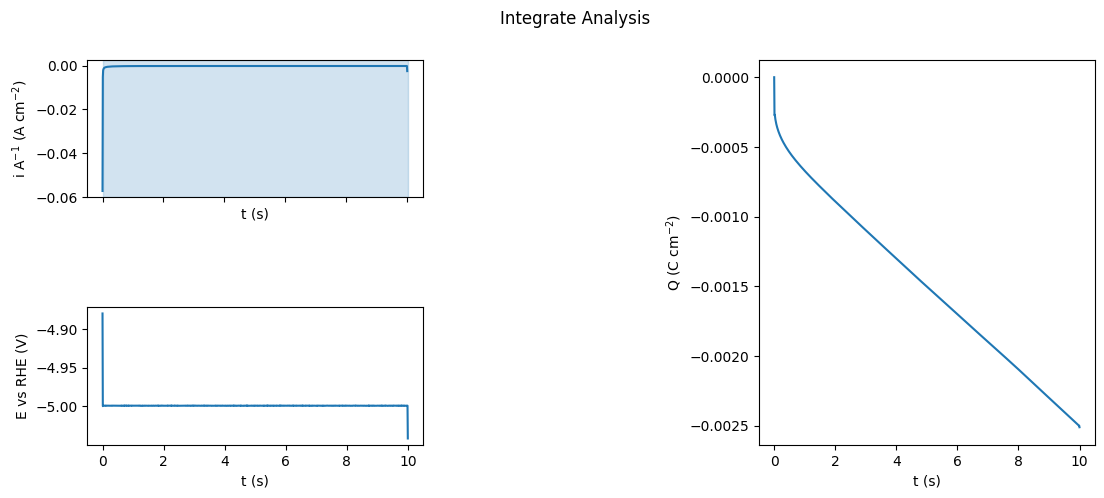

In [11]:
print(ds[1].integrate(0,10,1,"area_cm", "RHE") )
#print(ds[0].integrate(0,10,5,"area"))
#ds[1].plot("area")
